<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project1</h3>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

## Importing the libraries

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [5]:
df = pd.read_csv(r"C:\Users\Rayan\Downloads\Compressed\16266862412498255\Mini Project 1 - Google Play store apps\googleplaystore.csv")
# take a look at the dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## EDA

In [6]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3283,Puzzle Alarm Clock ⏰,TOOLS,4.3,32111,5.3M,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",3.1.0.1126,4.4 and up
10550,FK Mladá Boleslav,SPORTS,NaN,0,26M,10+,Free,0,Everyone,Sports,"March 18, 2018",2.0,4.1 and up
3910,My Talking Angela,FAMILY,4.5,9876369,99M,"100,000,000+",Free,0,Everyone,Casual,"July 3, 2018",3.7.2.51,4.1 and up
3699,Video.Guru - Video Maker,VIDEO_PLAYERS,4.6,36969,27M,"1,000,000+",Free,0,Everyone,Video Players & Editors,"August 6, 2018",1.137.22,4.3 and up
10102,EY Events Switzerland,PRODUCTIVITY,NaN,1,18M,500+,Free,0,Teen,Productivity,"June 29, 2018",7.17.2.3,5.0 and up


In [7]:
# summarize the data
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Preprocessing

In [10]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
df.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [12]:
objList = df.select_dtypes(include = "object").columns
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

df.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,6963,1,4.1,1182,54,7,1,91,1,9,561,118,15
1,2632,1,3.9,5923,28,19,1,91,1,12,481,1018,15
2,8657,1,4.7,5680,367,14,1,91,1,9,116,464,15
3,7828,1,4.5,1946,100,17,1,91,4,9,824,2765,18
4,7023,1,4.3,5923,63,10,1,91,1,11,756,277,20


In [13]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.741216  , -2.00181778,  0.31335945, ..., -0.20663839,
        -1.23025646, -0.34611215],
       [-0.81574615, -2.00181778,  0.18191955, ..., -0.44339963,
        -0.2825716 , -0.34611215],
       [ 1.35019634, -2.00181778,  0.70767913, ..., -1.5236228 ,
        -0.86592428, -0.34611215],
       ...,
       [ 0.71569203,  0.39216646, -2.38115838, ..., -0.37237126,
        -1.23552138, -1.45495981],
       [ 1.2560093 , -1.64272014,  0.57623924, ..., -0.3990069 ,
         1.55699002,  2.01018911],
       [ 1.64857514,  0.15276804,  0.57623924, ...,  0.04492043,
         1.55699002,  2.01018911]])

In [21]:
print(df.corr()['Genres'].abs())

App               0.019800
Category          0.791484
Rating            0.045489
Reviews           0.022849
Size              0.003550
Installs          0.005152
Type              0.000430
Price             0.003977
Content Rating    0.128218
Genres            1.000000
Last Updated      0.037719
Current Ver       0.099337
Android Ver       0.104648
Name: Genres, dtype: float64


## Strorytelling - Visualization

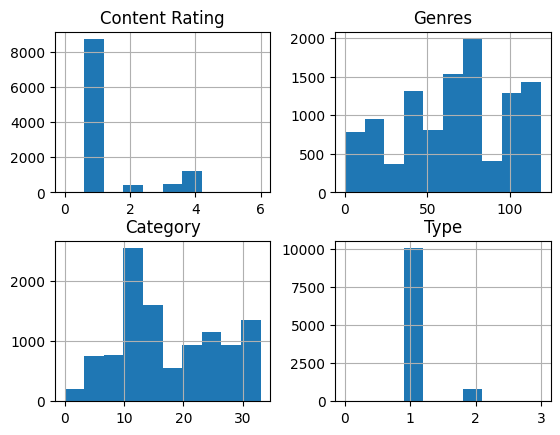

In [15]:
viz = df[['Content Rating','Genres','Category','Type']]
viz.hist()
plt.show()

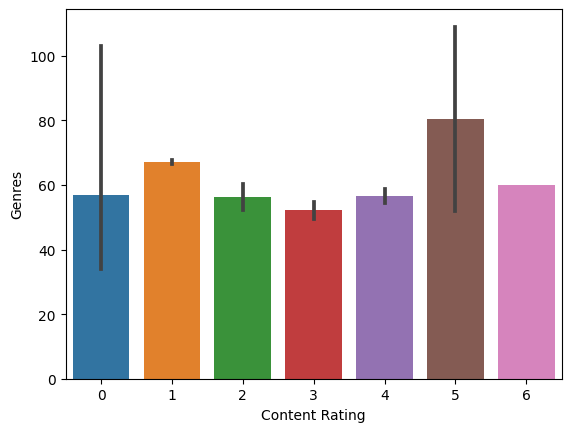

In [16]:
sns.barplot(x="Content Rating", y="Genres", data = df)
plt.show()

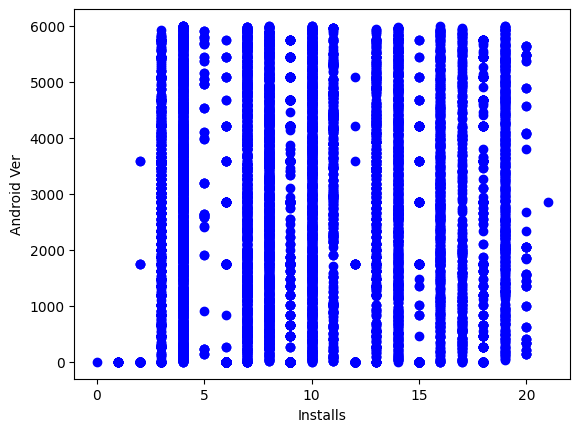

In [17]:
plt.scatter(df.Installs, df.Reviews, color='Blue')
plt.xlabel("Installs")
plt.ylabel("Android Ver")
plt.show()


## Send us the Result (Maktabkhoone)